In [61]:
import numpy as np
import pandas as pd


In [62]:
##Importação dos dados de treino

In [63]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_5988\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_5988\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_5988\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [64]:
##Remoção de valores nulos

In [65]:
fd001_train = fd001_train.dropna()
fd001_test = fd001_test.dropna()

In [66]:
##Introdução do cabeçalho do data frame

In [67]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [68]:
##Geração de Histogramas e seleção de variáveis

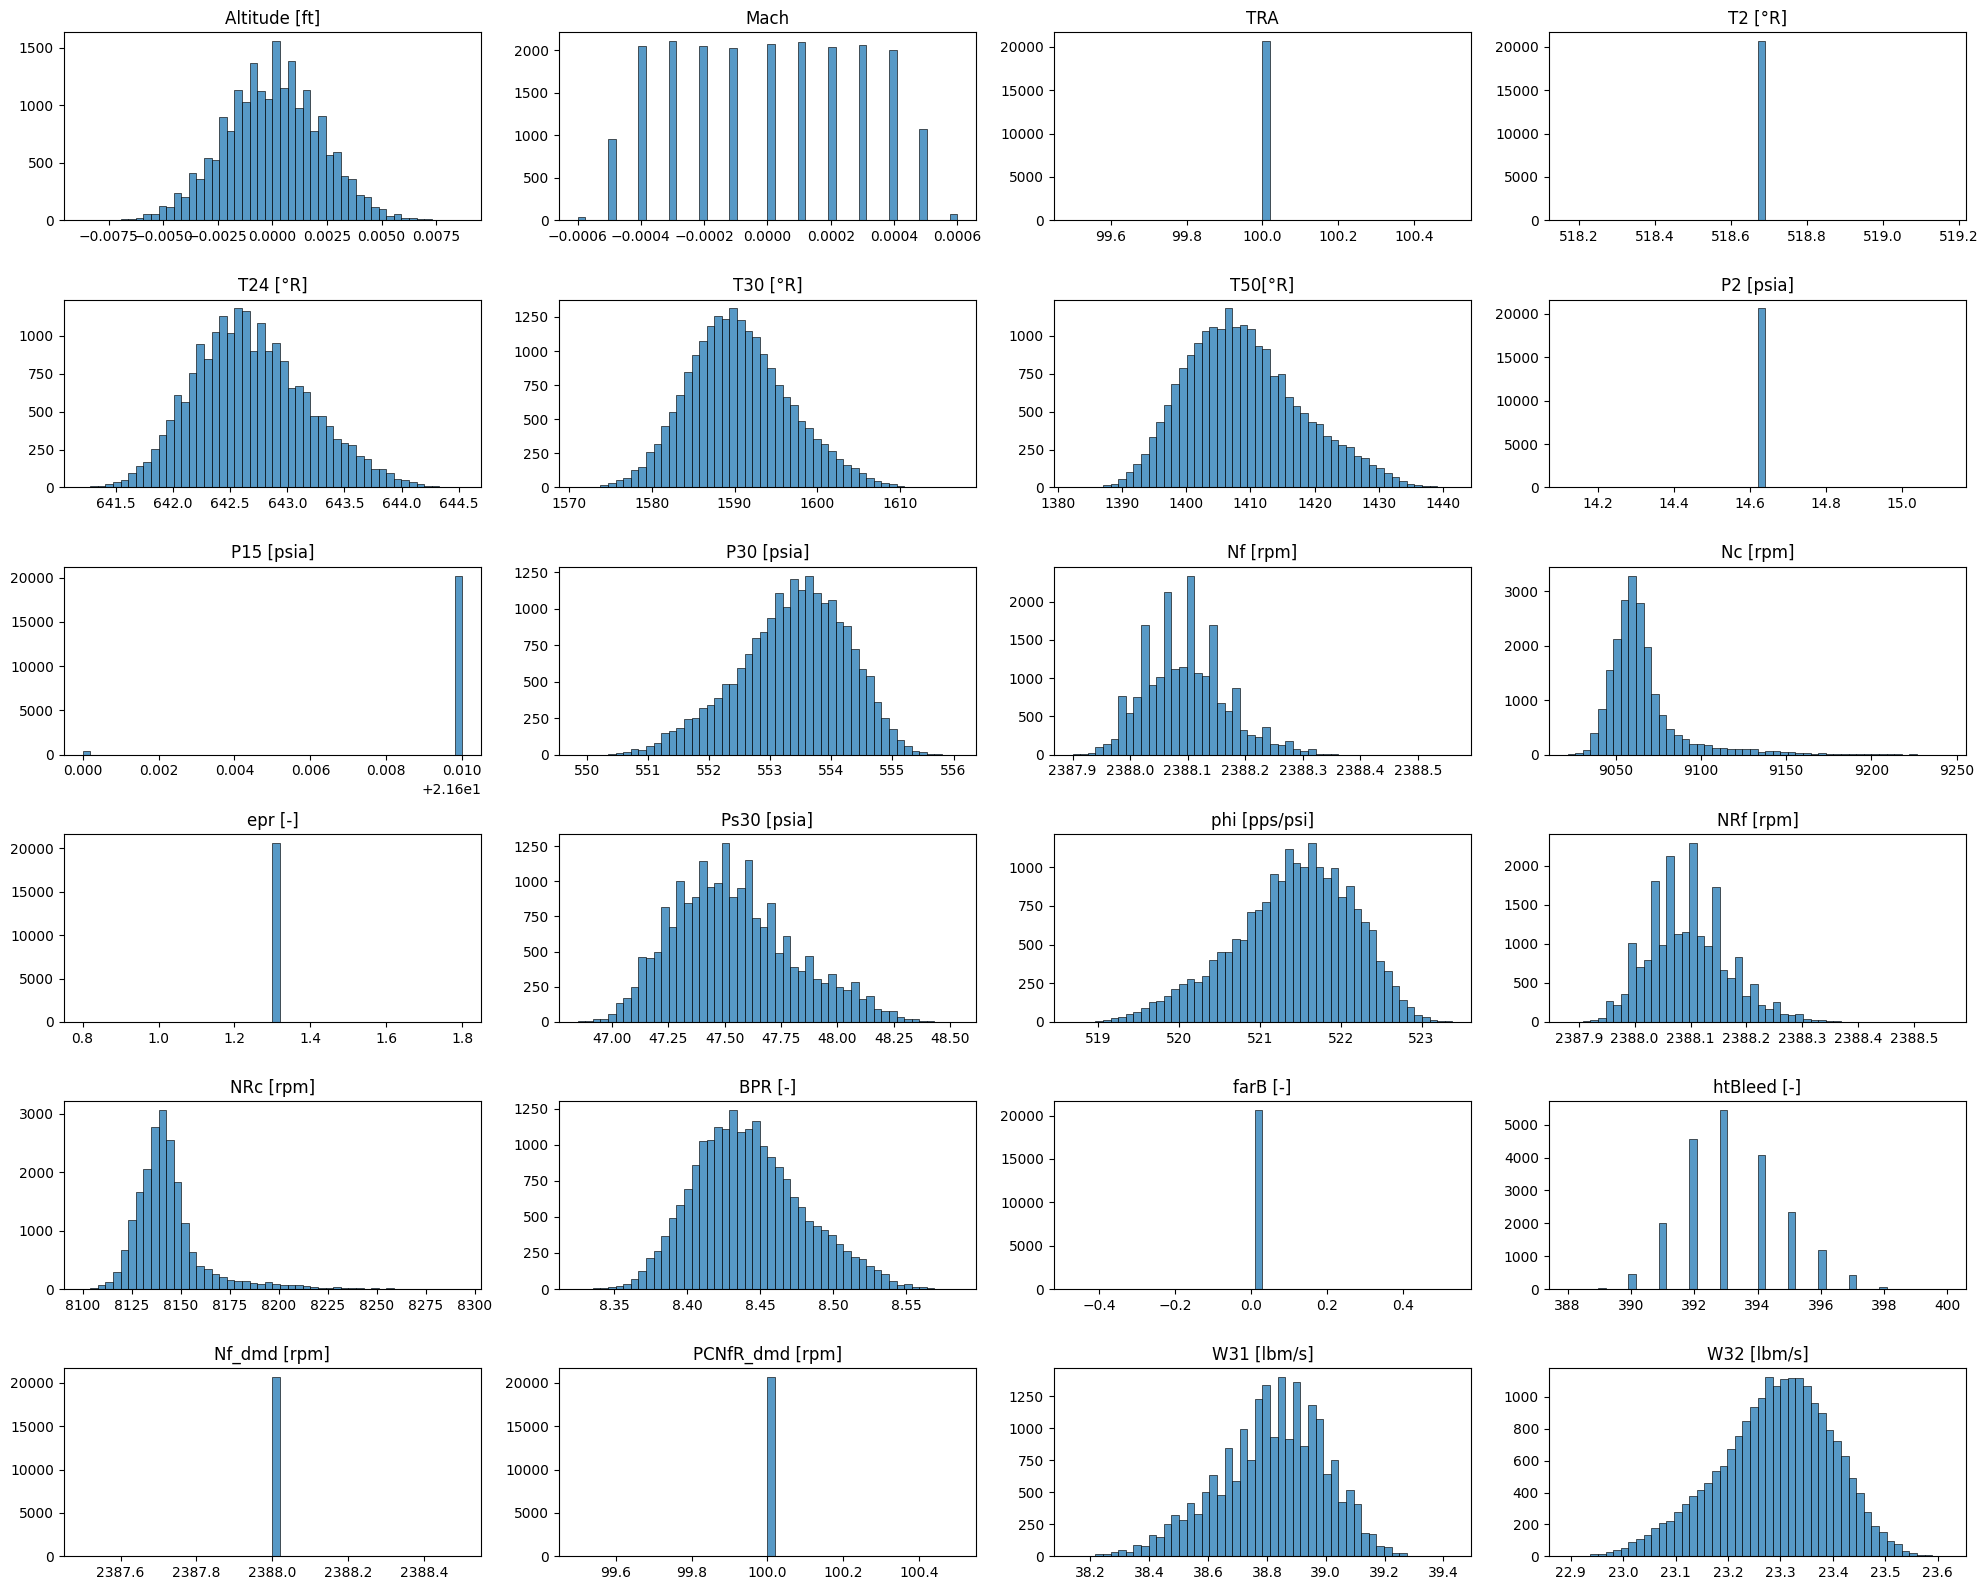

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [70]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]' ,'epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [71]:
##Normalização 

In [72]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [73]:
##Definição dos targets para regressão nos dados de treino

In [74]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [75]:
##Visualização de um ciclo de vida de um motor 

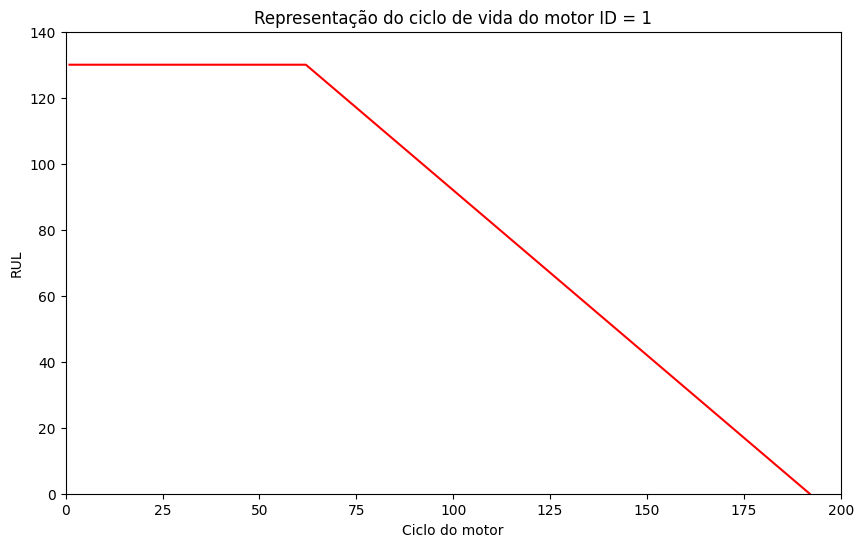

In [76]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [77]:
##Definição dos targets para regressão nos dados de teste 

In [78]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [79]:
##Criação das janelas de tempo para dados de treino e de teste

In [80]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [81]:
##Separação das variáveis de treino e teste

In [82]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [83]:
##Criação do modelo LSTM

In [84]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm=hp.Int('layers_lstm',1,3)
    n_layers_dense=hp.Int('layers_dense',1,3)
    model.add(LSTM(hp.Choice('lstm_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_lstm):
        return_seq = i <n_layers_lstm -1
        model.add(LSTM(hp.Choice(f'lstm_{i+1}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models(num_models=1)[0]
best_trial=tuner_lstm.oracle.get_best_trials(num_trials=1)[0]
param_lstm=best_trial.hyperparameters.get_config()['values']
n_lstm = int(param_lstm.get('layers_lstm',1))+1
n_dense=int(param_lstm.get('layers_dense',1))+1
best_param_lstm = {}

for k in range(n_lstm):
    key1=f'lstm_{k}'
    key2 = f'dropout_{k}'
    best_param_lstm[key1] = param_lstm[key1]
    best_param_lstm[key2] = param_lstm[key2] 

for k in range(n_dense):
    key3=f'dense_{k}'
    if k < n_dense-1:
        best_param_lstm[key3] = param_lstm[key3]
    else:
        best_param_lstm[key3] = 1

best_param_lstm['learning_rate'] = param_lstm['learning_rate']
print(f'n_lstm = {n_lstm}, n_dense = {n_dense}')
for k,v in best_param_lstm.items():
    print(f'{k:15s} -> {v}')

Trial 10 Complete [00h 03m 50s]
val_loss: 239.82965087890625

Best val_loss So Far: 207.2854766845703
Total elapsed time: 01h 10m 13s
n_lstm = 2, n_dense = 2
lstm_0          -> 128
dropout_0       -> 0.4000000000000001
lstm_1          -> 64
dropout_1       -> 0.2
dense_0         -> 64
dense_1         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [85]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 260.0297 - mean_absolute_error: 12.0499 - mean_squared_error: 260.0297

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 243.3304 - mean_absolute_error: 11.6352 - mean_squared_error: 243.3304 - val_loss: 190.7945 - val_mean_absolute_error: 9.7613 - val_mean_squared_error: 190.7945
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 228.4551 - mean_absolute_error: 11.2038 - mean_squared_error: 228.4551

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 232.2035 - mean_absolute_error: 11.2924 - mean_squared_error: 232.2035 - val_loss: 199.5459 - val_mean_absolute_error: 10.4710 - val_mean_squared_error: 199.5459
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 235.7435 - mean_absolute_error: 11.3576 - mean_squared_error: 235.7435

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 230.9201 - mean_absolute_error: 11.2286 - mean_squared_error: 230.9201 - val_loss: 186.8244 - val_mean_absolute_error: 10.2518 - val_mean_squared_error: 186.8244
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 229.3541 - mean_absolute_error: 11.2528 - mean_squared_error: 229.3541

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 234.6397 - mean_absolute_error: 11.3687 - mean_squared_error: 234.6397 - val_loss: 184.0000 - val_mean_absolute_error: 10.2599 - val_mean_squared_error: 184.0000
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 220.7957 - mean_absolute_error: 11.0416 - mean_squared_error: 220.7957

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 226.8295 - mean_absolute_error: 11.1906 - mean_squared_error: 226.8295 - val_loss: 272.0315 - val_mean_absolute_error: 12.3066 - val_mean_squared_error: 272.0315
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 229.9122 - mean_absolute_error: 11.1922 - mean_squared_error: 229.9122

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 230.1009 - mean_absolute_error: 11.1675 - mean_squared_error: 230.1009 - val_loss: 251.8488 - val_mean_absolute_error: 11.9604 - val_mean_squared_error: 251.8488
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 224.7066 - mean_absolute_error: 11.1493 - mean_squared_error: 224.7066

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 223.4018 - mean_absolute_error: 11.0938 - mean_squared_error: 223.4018 - val_loss: 179.3992 - val_mean_absolute_error: 9.7729 - val_mean_squared_error: 179.3992
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 220.8819 - mean_absolute_error: 10.9569 - mean_squared_error: 220.8819

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 218.1226 - mean_absolute_error: 10.8842 - mean_squared_error: 218.1226 - val_loss: 195.9401 - val_mean_absolute_error: 9.9482 - val_mean_squared_error: 195.9401
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 228.8468 - mean_absolute_error: 11.1767 - mean_squared_error: 228.8468

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 223.8112 - mean_absolute_error: 11.0583 - mean_squared_error: 223.8112 - val_loss: 196.7865 - val_mean_absolute_error: 9.8404 - val_mean_squared_error: 196.7865
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 220.7085 - mean_absolute_error: 10.9430 - mean_squared_error: 220.7085

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 221.7930 - mean_absolute_error: 10.9843 - mean_squared_error: 221.7930 - val_loss: 179.0963 - val_mean_absolute_error: 9.8406 - val_mean_squared_error: 179.0963
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 210.1679 - mean_absolute_error: 10.7254 - mean_squared_error: 210.1679

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 217.5078 - mean_absolute_error: 10.8894 - mean_squared_error: 217.5078 - val_loss: 187.2034 - val_mean_absolute_error: 10.1199 - val_mean_squared_error: 187.2034
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 219.1311 - mean_absolute_error: 10.8525 - mean_squared_error: 219.1311

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 220.2025 - mean_absolute_error: 10.9072 - mean_squared_error: 220.2025 - val_loss: 177.6540 - val_mean_absolute_error: 9.6966 - val_mean_squared_error: 177.6540
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 214.2416 - mean_absolute_error: 10.7450 - mean_squared_error: 214.2416

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 217.2179 - mean_absolute_error: 10.8316 - mean_squared_error: 217.2179 - val_loss: 181.0131 - val_mean_absolute_error: 9.9520 - val_mean_squared_error: 181.0131
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 208.4006 - mean_absolute_error: 10.6364 - mean_squared_error: 208.4006

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 215.4262 - mean_absolute_error: 10.8001 - mean_squared_error: 215.4262 - val_loss: 174.8270 - val_mean_absolute_error: 9.9264 - val_mean_squared_error: 174.8270
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 214.4341 - mean_absolute_error: 10.7873 - mean_squared_error: 214.4341

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 211.8689 - mean_absolute_error: 10.7387 - mean_squared_error: 211.8689 - val_loss: 174.9707 - val_mean_absolute_error: 9.3457 - val_mean_squared_error: 174.9707
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 211.9610 - mean_absolute_error: 10.7492 - mean_squared_error: 211.9610

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 211.2556 - mean_absolute_error: 10.6881 - mean_squared_error: 211.2556 - val_loss: 179.3558 - val_mean_absolute_error: 9.7731 - val_mean_squared_error: 179.3558
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 208.4872 - mean_absolute_error: 10.6162 - mean_squared_error: 208.4872

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 207.4013 - mean_absolute_error: 10.6206 - mean_squared_error: 207.4013 - val_loss: 170.1583 - val_mean_absolute_error: 9.3973 - val_mean_squared_error: 170.1583
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 205.0041 - mean_absolute_error: 10.5281 - mean_squared_error: 205.0041

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 203.9983 - mean_absolute_error: 10.4768 - mean_squared_error: 203.9983 - val_loss: 172.2110 - val_mean_absolute_error: 9.6164 - val_mean_squared_error: 172.2110
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 213.0026 - mean_absolute_error: 10.7144 - mean_squared_error: 213.0026

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 210.3158 - mean_absolute_error: 10.6304 - mean_squared_error: 210.3158 - val_loss: 199.9550 - val_mean_absolute_error: 10.6248 - val_mean_squared_error: 199.9550
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 202.2866 - mean_absolute_error: 10.3866 - mean_squared_error: 202.2866

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 206.4981 - mean_absolute_error: 10.5269 - mean_squared_error: 206.4981 - val_loss: 167.2756 - val_mean_absolute_error: 9.1414 - val_mean_squared_error: 167.2756
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 194.5027 - mean_absolute_error: 10.2482 - mean_squared_error: 194.5027

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 201.7463 - mean_absolute_error: 10.4195 - mean_squared_error: 201.7463 - val_loss: 170.3546 - val_mean_absolute_error: 9.8759 - val_mean_squared_error: 170.3546
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 203.6927 - mean_absolute_error: 10.4585 - mean_squared_error: 203.6927

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 205.0946 - mean_absolute_error: 10.5160 - mean_squared_error: 205.0946 - val_loss: 175.6342 - val_mean_absolute_error: 9.5464 - val_mean_squared_error: 175.6342
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 207.8870 - mean_absolute_error: 10.5539 - mean_squared_error: 207.8870

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 205.3615 - mean_absolute_error: 10.5044 - mean_squared_error: 205.3615 - val_loss: 161.8869 - val_mean_absolute_error: 8.9388 - val_mean_squared_error: 161.8869
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 201.5431 - mean_absolute_error: 10.4094 - mean_squared_error: 201.5431

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 202.3595 - mean_absolute_error: 10.4315 - mean_squared_error: 202.3595 - val_loss: 169.0335 - val_mean_absolute_error: 9.1654 - val_mean_squared_error: 169.0335
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 200.7536 - mean_absolute_error: 10.3942 - mean_squared_error: 200.7536

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 198.2428 - mean_absolute_error: 10.3383 - mean_squared_error: 198.2428 - val_loss: 219.7295 - val_mean_absolute_error: 11.2566 - val_mean_squared_error: 219.7295
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 198.5668 - mean_absolute_error: 10.3416 - mean_squared_error: 198.5668

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 195.3131 - mean_absolute_error: 10.2344 - mean_squared_error: 195.3131 - val_loss: 171.6050 - val_mean_absolute_error: 9.2849 - val_mean_squared_error: 171.6050
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 198.7777 - mean_absolute_error: 10.2809 - mean_squared_error: 198.7777

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 197.7118 - mean_absolute_error: 10.2910 - mean_squared_error: 197.7118 - val_loss: 153.1532 - val_mean_absolute_error: 9.0886 - val_mean_squared_error: 153.1532
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 191.9675 - mean_absolute_error: 10.1673 - mean_squared_error: 191.9675

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 192.9982 - mean_absolute_error: 10.1854 - mean_squared_error: 192.9982 - val_loss: 167.5522 - val_mean_absolute_error: 9.1723 - val_mean_squared_error: 167.5522
Epoch 29/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 186.4774 - mean_absolute_error: 10.0359 - mean_squared_error: 186.4774

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 191.0141 - mean_absolute_error: 10.1337 - mean_squared_error: 191.0141 - val_loss: 190.7298 - val_mean_absolute_error: 10.1994 - val_mean_squared_error: 190.7298
Epoch 30/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 194.0888 - mean_absolute_error: 10.2294 - mean_squared_error: 194.0888

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 192.1032 - mean_absolute_error: 10.1239 - mean_squared_error: 192.1032 - val_loss: 143.9539 - val_mean_absolute_error: 8.7660 - val_mean_squared_error: 143.9539


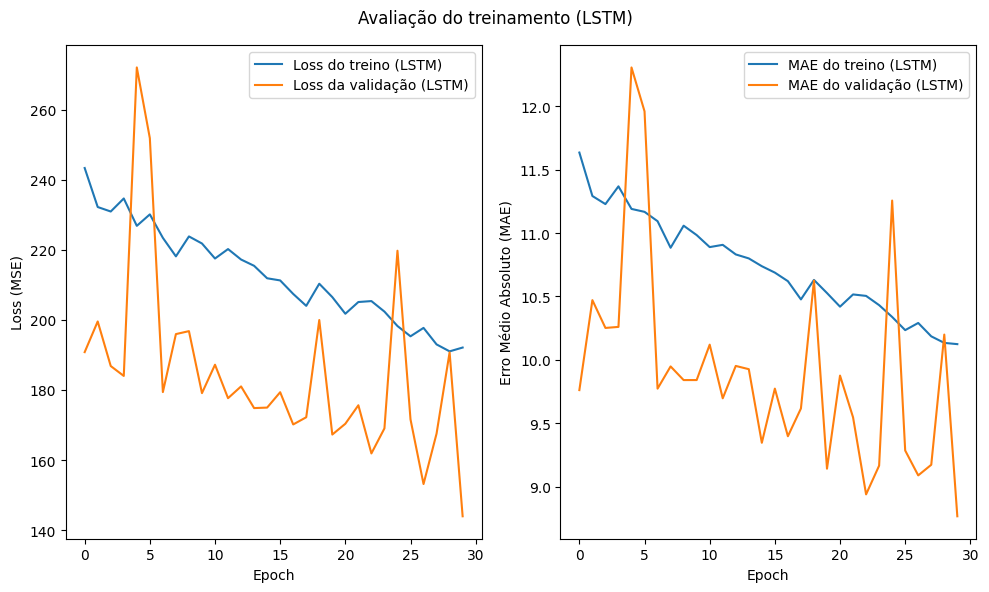

In [86]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [87]:
##Testando o modelo com os dados de teste 

In [88]:
rul_prev = best_model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [89]:
##Avaliando o modelo

213.9098943437722
14.63
0.11877558333713437
10.945162643049688
0.784002639665175
Tempo de 4477.2717072963715s


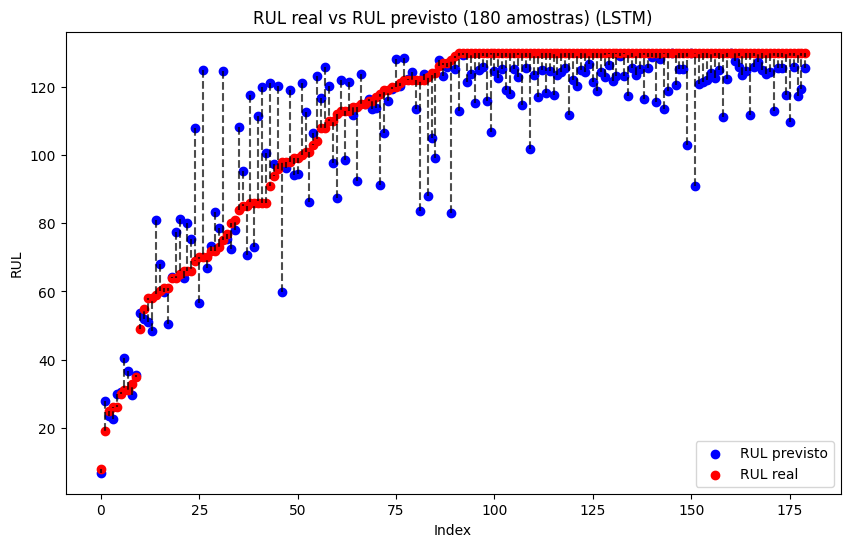

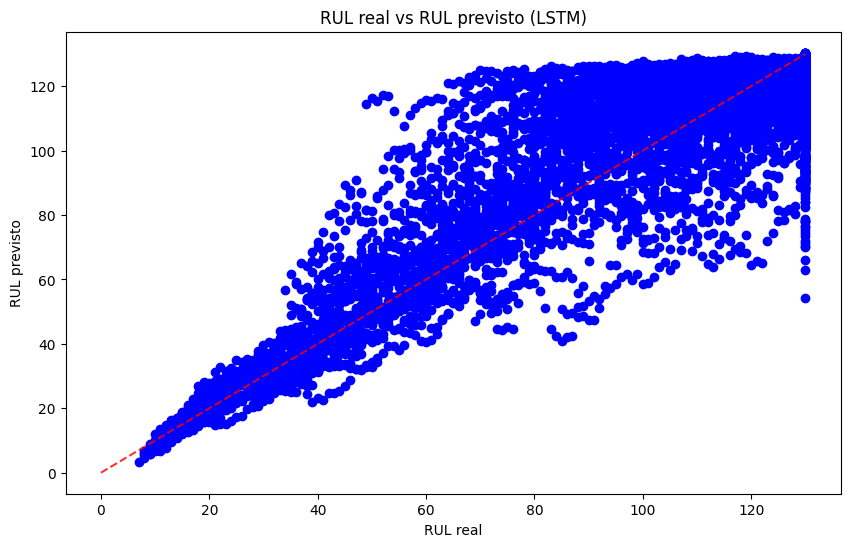

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [91]:
##Criando modelo BiLSTM

In [92]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi=hp.Int('layers_bi',1,3)
    n_layers_dense=hp.Int('layers_dense',1,3)
    model.add(Bidirectional(LSTM(hp.Choice('bi_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_bi):
        return_seq = i <n_layers_bi -1
        model.add(Bidirectional(LSTM(hp.Choice(f'bi_{i+1}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_bi',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models(num_models=1)[0]
best_trial=tuner_bilstm.oracle.get_best_trials(num_trials=1)[0]
param_bi = best_trial.hyperparameters.get_config()['values']
n_bi = int(param_bi.get('layers_bi',1))
n_dense = int(param_bi.get('layers_dense',1)) 
best_param_bi={}

for k in range(n_bi):
    key1 = f'bi_{k}'
    key2 = f'dropout_{k}'
    best_param_bi[key1] = param_bi[key1]
    best_param_bi[key2] = param_bi[key2]

for k in range(n_dense):
    key3 =f'dense_{k}'
    if k < n_dense -1:
        best_param_bi[key3] = param_bi[key3]
    else:
        best_param_bi[key3] = 1

best_param_bi['learning_rate'] = param_bi['learning_rate'] 
print(f'n_bi = {n_bi}, n_dense = {n_dense}')
for k,v in best_param_bi.items():
    print(f'{k:15s} -> {v}')

Trial 10 Complete [00h 03m 54s]
val_loss: 192.94834899902344

Best val_loss So Far: 192.94834899902344
Total elapsed time: 01h 04m 10s
n_bi = 1, n_dense = 3
bi_0            -> 64
dropout_0       -> 0.2
dense_0         -> 256
dense_1         -> 256
dense_2         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [93]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 285.5179 - mean_absolute_error: 12.5552 - mean_squared_error: 285.5179

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - loss: 249.0635 - mean_absolute_error: 11.8071 - mean_squared_error: 249.0635 - val_loss: 195.6842 - val_mean_absolute_error: 10.6797 - val_mean_squared_error: 195.6842
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 237.4259 - mean_absolute_error: 11.4798 - mean_squared_error: 237.4259

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 233.6552 - mean_absolute_error: 11.4099 - mean_squared_error: 233.6552 - val_loss: 205.4389 - val_mean_absolute_error: 11.1744 - val_mean_squared_error: 205.4389
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 222.5731 - mean_absolute_error: 11.1993 - mean_squared_error: 222.5731

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 232.2836 - mean_absolute_error: 11.3707 - mean_squared_error: 232.2836 - val_loss: 212.0859 - val_mean_absolute_error: 9.9519 - val_mean_squared_error: 212.0859
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 229.3234 - mean_absolute_error: 11.3550 - mean_squared_error: 229.3234

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 226.5400 - mean_absolute_error: 11.2262 - mean_squared_error: 226.5400 - val_loss: 178.0750 - val_mean_absolute_error: 10.0680 - val_mean_squared_error: 178.0750
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 221.1979 - mean_absolute_error: 10.9794 - mean_squared_error: 221.1979

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 225.1493 - mean_absolute_error: 11.0865 - mean_squared_error: 225.1493 - val_loss: 179.7650 - val_mean_absolute_error: 10.2278 - val_mean_squared_error: 179.7650
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 222.4789 - mean_absolute_error: 11.0831 - mean_squared_error: 222.4789

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 224.3881 - mean_absolute_error: 11.1306 - mean_squared_error: 224.3881 - val_loss: 218.6605 - val_mean_absolute_error: 11.1076 - val_mean_squared_error: 218.6605
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 218.9873 - mean_absolute_error: 10.8728 - mean_squared_error: 218.9873

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 220.8431 - mean_absolute_error: 10.9532 - mean_squared_error: 220.8431 - val_loss: 229.4226 - val_mean_absolute_error: 10.3807 - val_mean_squared_error: 229.4226
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 228.9395 - mean_absolute_error: 11.1146 - mean_squared_error: 228.9395

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 220.5293 - mean_absolute_error: 10.9617 - mean_squared_error: 220.5293 - val_loss: 240.8551 - val_mean_absolute_error: 10.4523 - val_mean_squared_error: 240.8551
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 215.1520 - mean_absolute_error: 10.8555 - mean_squared_error: 215.1520

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 213.5770 - mean_absolute_error: 10.8282 - mean_squared_error: 213.5770 - val_loss: 286.5135 - val_mean_absolute_error: 13.1940 - val_mean_squared_error: 286.5135


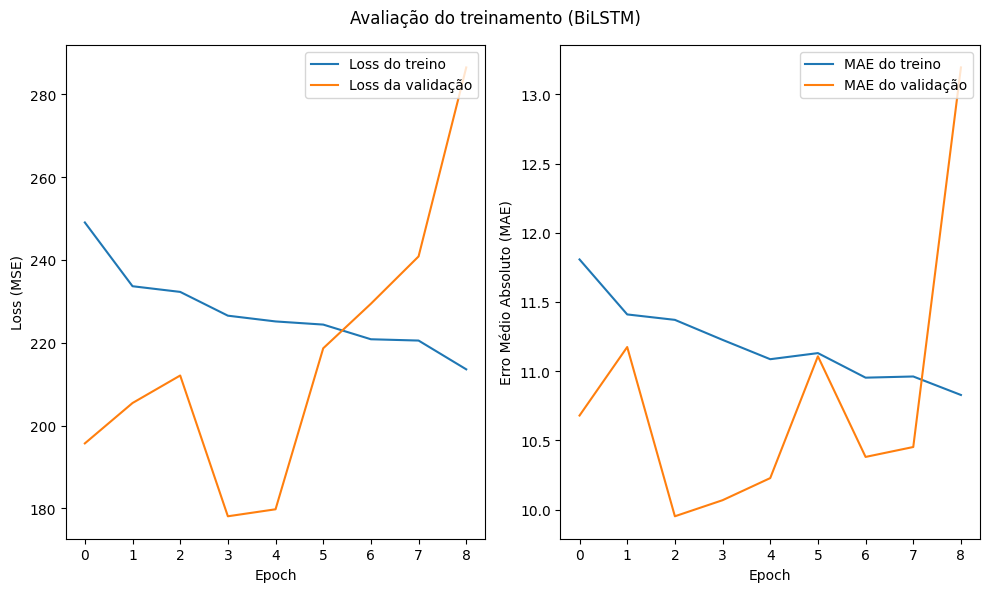

In [94]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [95]:
##Testando o modelo com os dados de teste

In [96]:
rul_prev = best_model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [97]:
##Avaliando o modelo

449.2836037838962
21.20
0.164645464508747
17.967410297967163
0.5463320069567211
Tempo de 3953.4204063415527s


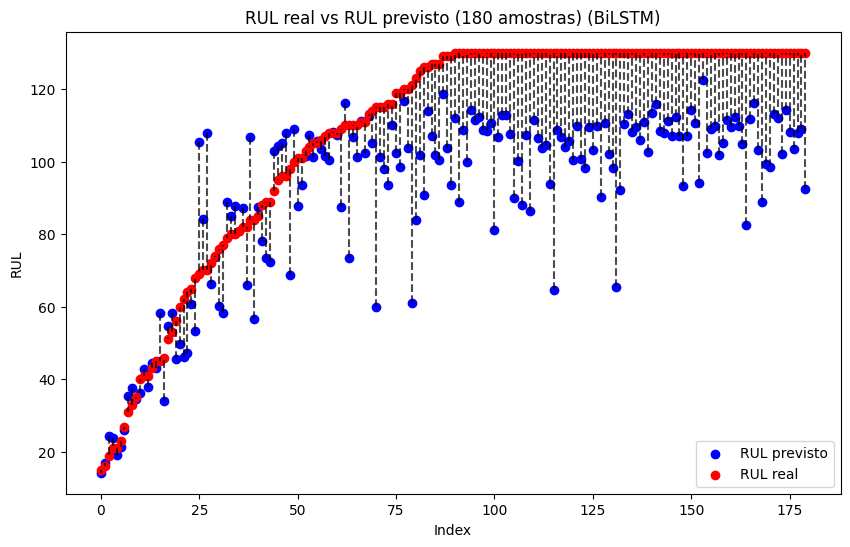

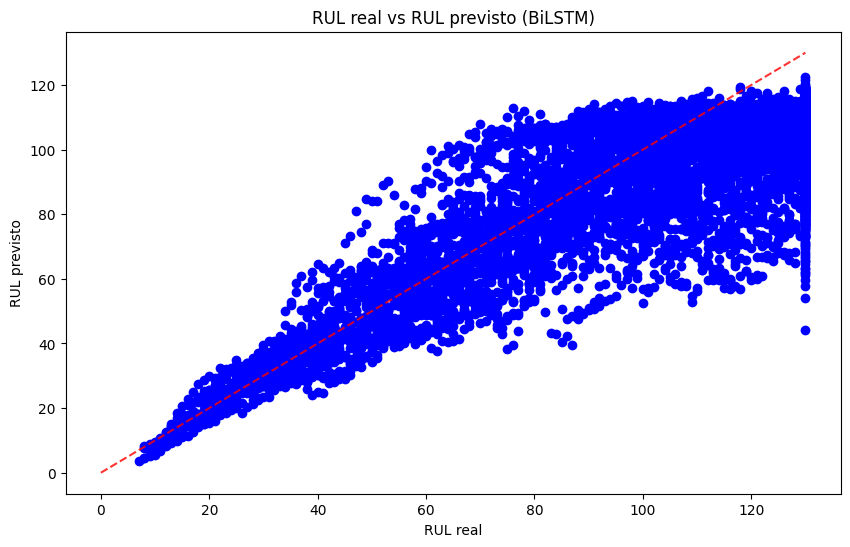

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()